## Scatterplots, beta, alpha, and correlation

In [1]:
# The code below increases the size of the output screen...

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

beta_UPRO=  2.99777859236 (Tells you how much more reactive it is to the market than the comparing stock.)
alpha_UPRO=  -6.80531934738e-05 (Denotes how well it performs with respect to the comparing stock.)


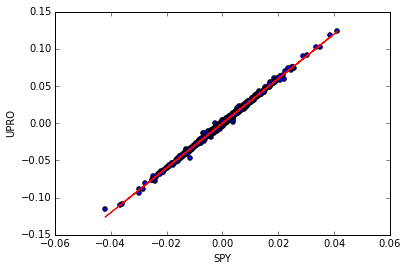



beta_GOOG=  0.982731085295
alpha_GOOG=  0.000371306167563


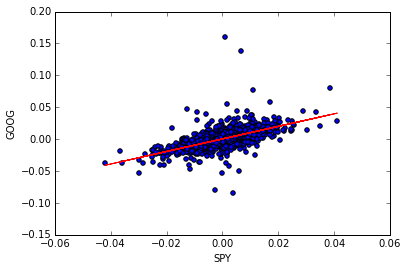



beta_AAPL=  0.956833177774
alpha_AAPL=  0.000157854827789


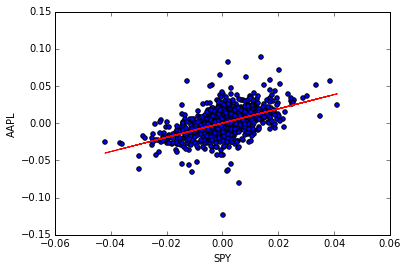



beta_AMZN=  1.11627320867
alpha_AMZN=  0.000517845134037


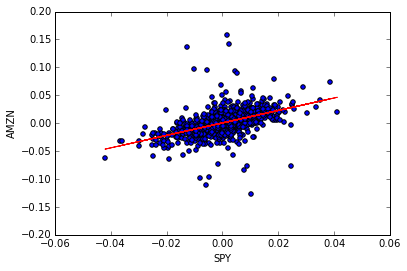



beta_DIS=  1.0494488886
alpha_DIS=  0.000393419646738


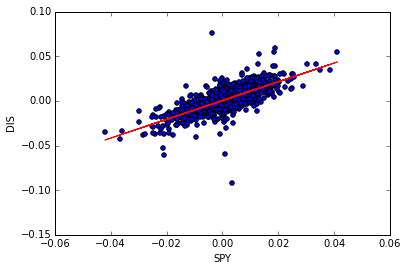



beta_NFLX=  1.22757647867
alpha_NFLX=  0.00121126489655


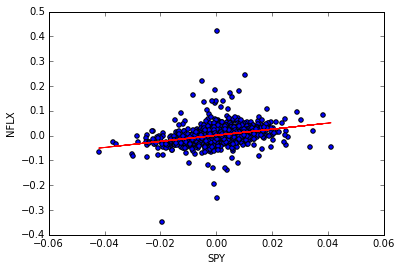



beta_FB=  0.781566074161
alpha_FB=  0.000763662340919


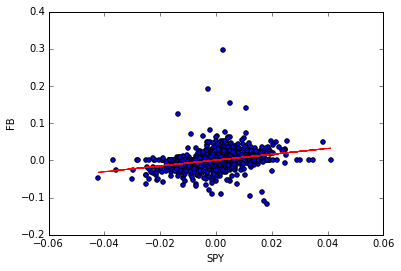



beta_AXY=  0.479740989869
alpha_AXY=  0.000474378390467


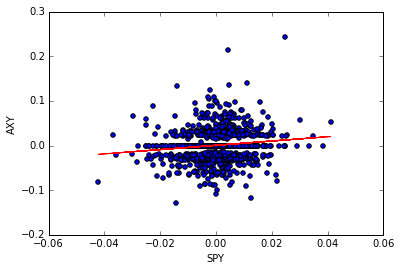



beta_VIX=  -7.06024152234
alpha_VIX=  0.00622195344907


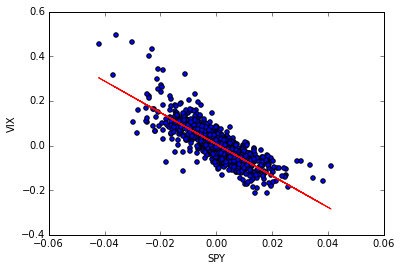



beta_TSLA=  1.33847145465
alpha_TSLA=  0.00136517024014


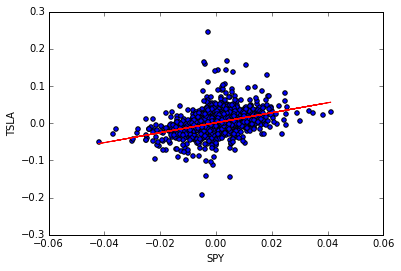



beta_GWPH=  0.663763395145
alpha_GWPH=  0.00243472141258


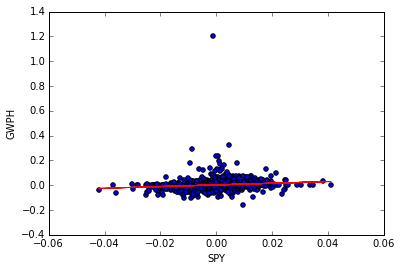



beta_MSFT=  1.04497270349
alpha_MSFT=  0.000226589535224


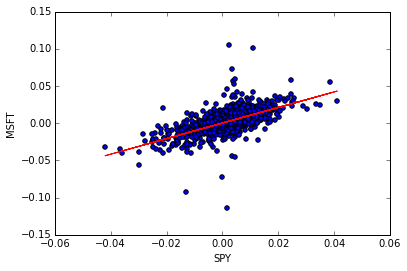



beta_GLD=  0.0553333147987
alpha_GLD=  -0.000143221843575


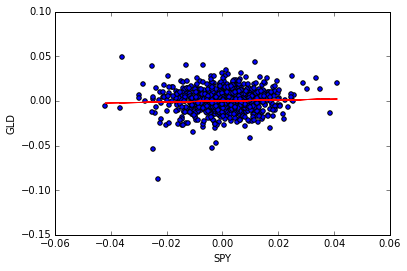



           SPY      UPRO      GOOG      AAPL      AMZN       DIS      NFLX  \
SPY   1.000000  0.998631  0.578509  0.503583  0.485028  0.720699  0.294764   
UPRO  0.998631  1.000000  0.581847  0.507135  0.486563  0.721060  0.296561   
GOOG  0.578509  0.581847  1.000000  0.336008  0.487723  0.391051  0.274758   
AAPL  0.503583  0.507135  0.336008  1.000000  0.250472  0.312356  0.118137   
AMZN  0.485028  0.486563  0.487723  0.250472  1.000000  0.356886  0.303961   
DIS   0.720699  0.721060  0.391051  0.312356  0.356886  1.000000  0.196895   
NFLX  0.294764  0.296561  0.274758  0.118137  0.303961  0.196895  1.000000   
FB    0.286558  0.286313  0.294067  0.183483  0.279408  0.201229  0.146927   
AXY   0.127244  0.128396  0.072643  0.108105  0.092548  0.071967  0.048418   
VIX  -0.812487 -0.810402 -0.470391 -0.390437 -0.411141 -0.582561 -0.240085   
TSLA  0.364777  0.363310  0.267763  0.199813  0.268139  0.276166  0.231691   
GWPH  0.122939  0.123030  0.086715  0.076708  0.094889  0.0872

In [6]:
def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    ax = df.plot(title=title, fontsize=12, figsize=(20,5))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


def compute_daily_returns(df):
    daily_returns = (df/df.shift(1)) - 1
    daily_returns.ix[0,:] = 0
    
    return daily_returns


def daily_returns():
    # Read data
    dates = pd.date_range('2011-09-26', '2016-09-26')
    symbols = ['SPY','UPRO','GOOG','AAPL','AMZN','DIS','NFLX','FB','AXY','VIX','TSLA','GWPH','MSFT','GLD']
    df = get_data(symbols, dates)
    
    # fill empty trade dates (for AXY)
    df.fillna(method="ffill", inplace="True")
    df.fillna(method="bfill", inplace="True")
    
    # plot_data(df)

    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    
    # Scatterplot - SPY and UPRO
    daily_returns.plot(kind='scatter', x='SPY', y='UPRO')
    beta_UPRO, alpha_UPRO =np.polyfit(daily_returns['SPY'], daily_returns['UPRO'],1)
    print "beta_UPRO= ", beta_UPRO, "(Tells you how much more reactive it is to the market than the comparing stock.)"
    print "alpha_UPRO= ", alpha_UPRO, "(Denotes how well it performs with respect to the comparing stock.)"
    plt.plot(daily_returns['SPY'], beta_UPRO*daily_returns['SPY'] + alpha_UPRO, '-', color='r')
    plt.show()
    print "\n"
    
    # Scatterplot - SPY and GOOG
    daily_returns.plot(kind='scatter', x='SPY', y='GOOG')
    beta_GOOG, alpha_GOOG =np.polyfit(daily_returns['SPY'], daily_returns['GOOG'],1)
    print "beta_GOOG= ", beta_GOOG
    print "alpha_GOOG= ", alpha_GOOG
    plt.plot(daily_returns['SPY'], beta_GOOG*daily_returns['SPY'] + alpha_GOOG, '-', color='r')
    plt.show()
    print "\n"
    
    # Scatterplot - SPY and AAPL
    daily_returns.plot(kind='scatter', x='SPY', y='AAPL')
    beta_AAPL, alpha_AAPL =np.polyfit(daily_returns['SPY'], daily_returns['AAPL'],1)
    print "beta_AAPL= ", beta_AAPL
    print "alpha_AAPL= ", alpha_AAPL
    plt.plot(daily_returns['SPY'], beta_AAPL*daily_returns['SPY'] + alpha_AAPL, '-', color='r')
    plt.show()
    print "\n"
    
    # Scatterplot - SPY and AMZN
    daily_returns.plot(kind='scatter', x='SPY', y='AMZN')
    beta_AMZN, alpha_AMZN =np.polyfit(daily_returns['SPY'], daily_returns['AMZN'],1)
    print "beta_AMZN= ", beta_AMZN
    print "alpha_AMZN= ", alpha_AMZN
    plt.plot(daily_returns['SPY'], beta_AMZN*daily_returns['SPY'] + alpha_AMZN, '-', color='r')
    plt.show()
    print "\n"
    
    # Scatterplot - SPY and DIS
    daily_returns.plot(kind='scatter', x='SPY', y='DIS')
    beta_DIS, alpha_DIS =np.polyfit(daily_returns['SPY'], daily_returns['DIS'],1)
    print "beta_DIS= ", beta_DIS
    print "alpha_DIS= ", alpha_DIS
    plt.plot(daily_returns['SPY'], beta_DIS*daily_returns['SPY'] + alpha_DIS, '-', color='r')
    plt.show()
    print "\n"
    
    # Scatterplot - SPY and NFLX
    daily_returns.plot(kind='scatter', x='SPY', y='NFLX')
    beta_NFLX, alpha_NFLX =np.polyfit(daily_returns['SPY'], daily_returns['NFLX'],1)
    print "beta_NFLX= ", beta_NFLX
    print "alpha_NFLX= ", alpha_NFLX
    plt.plot(daily_returns['SPY'], beta_NFLX*daily_returns['SPY'] + alpha_NFLX, '-', color='r')
    plt.show()
    print "\n"
    
    # Scatterplot - SPY and FB
    daily_returns.plot(kind='scatter', x='SPY', y='FB')
    beta_FB, alpha_FB =np.polyfit(daily_returns['SPY'], daily_returns['FB'],1)
    print "beta_FB= ", beta_FB
    print "alpha_FB= ", alpha_FB
    plt.plot(daily_returns['SPY'], beta_FB*daily_returns['SPY'] + alpha_FB, '-', color='r')
    plt.show()
    print "\n"
    
    # Scatterplot - SPY and AXY
    daily_returns.plot(kind='scatter', x='SPY', y='AXY')
    beta_AXY, alpha_AXY =np.polyfit(daily_returns['SPY'], daily_returns['AXY'],1)
    print "beta_AXY= ", beta_AXY
    print "alpha_AXY= ", alpha_AXY
    plt.plot(daily_returns['SPY'], beta_AXY*daily_returns['SPY'] + alpha_AXY, '-', color='r')
    plt.show()
    print "\n"
    
    # Scatterplot - SPY and VIX
    daily_returns.plot(kind='scatter', x='SPY', y='VIX')
    beta_VIX, alpha_VIX =np.polyfit(daily_returns['SPY'], daily_returns['VIX'],1)
    print "beta_VIX= ", beta_VIX
    print "alpha_VIX= ", alpha_VIX
    plt.plot(daily_returns['SPY'], beta_VIX*daily_returns['SPY'] + alpha_VIX, '-', color='r')
    plt.show()
    print "\n"
    
    # Scatterplot - SPY and TSLA
    daily_returns.plot(kind='scatter', x='SPY', y='TSLA')
    beta_TSLA, alpha_TSLA =np.polyfit(daily_returns['SPY'], daily_returns['TSLA'],1)
    print "beta_TSLA= ", beta_TSLA
    print "alpha_TSLA= ", alpha_TSLA
    plt.plot(daily_returns['SPY'], beta_TSLA*daily_returns['SPY'] + alpha_TSLA, '-', color='r')
    plt.show()
    print "\n"
    
    # Scatterplot - SPY and GWPH
    daily_returns.plot(kind='scatter', x='SPY', y='GWPH')
    beta_GWPH, alpha_GWPH =np.polyfit(daily_returns['SPY'], daily_returns['GWPH'],1)
    print "beta_GWPH= ", beta_GWPH
    print "alpha_GWPH= ", alpha_GWPH
    plt.plot(daily_returns['SPY'], beta_GWPH*daily_returns['SPY'] + alpha_GWPH, '-', color='r')
    plt.show()
    print "\n"
    
    # Scatterplot - SPY and MSFT
    daily_returns.plot(kind='scatter', x='SPY', y='MSFT')
    beta_MSFT, alpha_MSFT =np.polyfit(daily_returns['SPY'], daily_returns['MSFT'],1)
    print "beta_MSFT= ", beta_MSFT
    print "alpha_MSFT= ", alpha_MSFT
    plt.plot(daily_returns['SPY'], beta_MSFT*daily_returns['SPY'] + alpha_MSFT, '-', color='r')
    plt.show()
    print "\n"
    
    # Scatterplot - SPY and GLD
    daily_returns.plot(kind='scatter', x='SPY', y='GLD')
    beta_GLD, alpha_GLD =np.polyfit(daily_returns['SPY'], daily_returns['GLD'],1)
    print "beta_GLD= ", beta_GLD
    print "alpha_GLD= ", alpha_GLD
    plt.plot(daily_returns['SPY'], beta_GLD*daily_returns['SPY'] + alpha_GLD, '-', color='r')
    plt.show()
    print "\n"
    
    print daily_returns.corr(method='pearson')
    
if __name__ == "__main__":
    
    daily_returns()
